EJEMPLO REGRESION LOGISTICA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'd:\\Universidad\\Cursos\\Machine Learning. Curso Basico Machine Learning\\Regresion Logistica'

In [3]:
entrenamiento = pd.read_csv('train.csv')
entrenamiento.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

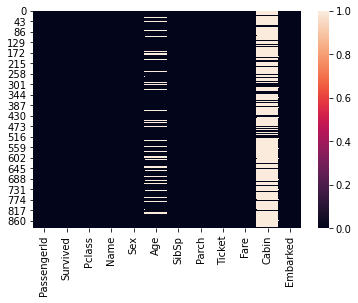

In [5]:
sns.heatmap(entrenamiento.isnull())

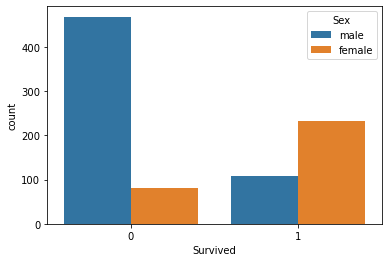

In [7]:
sns.countplot(x='Survived', data=entrenamiento, hue= 'Sex')

In [8]:
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

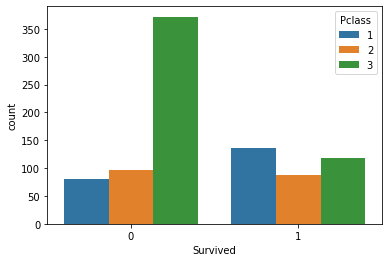

In [9]:
sns.countplot(x='Survived', data=entrenamiento, hue= 'Pclass')

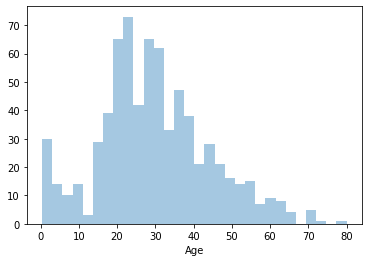

In [10]:
sns.distplot(entrenamiento['Age'].dropna(),kde=False, bins=30)

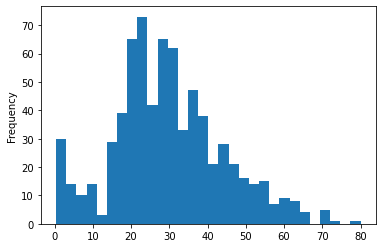

In [11]:
entrenamiento['Age'].plot.hist(bins=30)

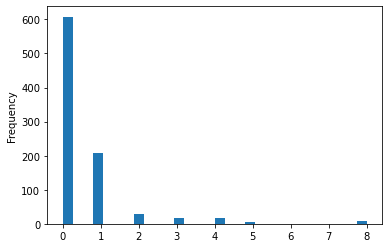

In [12]:
entrenamiento['SibSp'].plot.hist(bins=30)

In [13]:
import cufflinks as cf

In [14]:
cf.go_offline()

In [17]:
entrenamiento['Fare'].iplot(kind='hist',bins=40)

LIMPIEZA DE DATOS

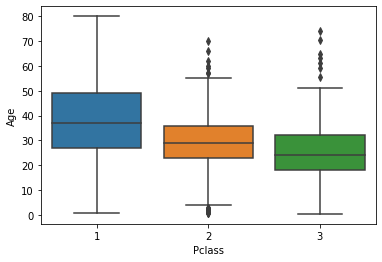

In [24]:
sns.boxplot(x='Pclass', y='Age', data = entrenamiento)

In [29]:
def edad_media(columna):
    edad= columna[0]
    clase = columna[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad

In [30]:
entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis=1)

In [32]:
entrenamiento['Age'].isnull() #Verificar si la columna Age tiene nulos

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [33]:
entrenamiento.drop('Cabin', axis=1, inplace= True) #Se borra definitivamente la columna 'Cabin'

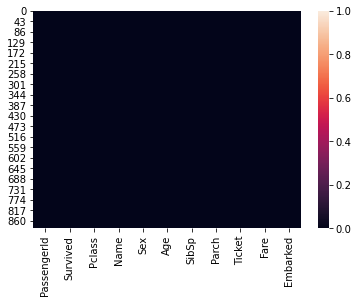

In [34]:
sns.heatmap(entrenamiento.isnull()) 

In [35]:
entrenamiento.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [36]:
entrenamiento.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True )

In [38]:
entrenamiento.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [42]:
sexo = pd.get_dummies(entrenamiento['Sex'],drop_first=True) #Convertimos que la columna Sex se vuelva binaria

In [43]:
entrenamiento = pd.concat([entrenamiento, sexo], axis=1)

In [44]:
entrenamiento.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  male
0         0       3    male  22.0      1      0   7.2500        S     1
1         1       1  female  38.0      1      0  71.2833        C     0
2         1       3  female  26.0      0      0   7.9250        S     0
3         1       1  female  35.0      1      0  53.1000        S     0
4         0       3    male  35.0      0      0   8.0500        S     1

In [45]:
entrenamiento.drop(['Sex'], axis=1, inplace=True )

In [46]:
entrenamiento.head()

Survived  Pclass   Age  SibSp  Parch     Fare Embarked  male
0         0       3  22.0      1      0   7.2500        S     1
1         1       1  38.0      1      0  71.2833        C     0
2         1       3  26.0      0      0   7.9250        S     0
3         1       1  35.0      1      0  53.1000        S     0
4         0       3  35.0      0      0   8.0500        S     1

In [49]:
puerto = pd.get_dummies(entrenamiento['Embarked'], drop_first=True)
puerto

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]

In [50]:
entrenamiento = pd.concat([entrenamiento, puerto], axis=1)

In [51]:
entrenamiento

Survived  Pclass   Age  SibSp  Parch     Fare Embarked  male  Q  S
0           0       3  22.0      1      0   7.2500        S     1  0  1
1           1       1  38.0      1      0  71.2833        C     0  0  0
2           1       3  26.0      0      0   7.9250        S     0  0  1
3           1       1  35.0      1      0  53.1000        S     0  0  1
4           0       3  35.0      0      0   8.0500        S     1  0  1
..        ...     ...   ...    ...    ...      ...      ...   ... .. ..
886         0       2  27.0      0      0  13.0000        S     1  0  1
887         1       1  19.0      0      0  30.0000        S     0  0  1
888         0       3  25.0      1      2  23.4500        S     0  0  1
889         1       1  26.0      0      0  30.0000        C     1  0  0
890         0       3  32.0      0      0   7.7500        Q     1  1  0

[891 rows x 10 columns]

In [52]:
entrenamiento.drop(['Embarked'], axis=1, inplace=True )

DIVISION DATOS DE ENTRENAMIENTO Y DATOS DE PRUEBA

In [53]:
y = entrenamiento['Survived']
X = entrenamiento.drop('Survived', axis=1)

In [55]:
from sklearn.model_selection import train_test_split 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=45)

In [58]:
y_train

650    0
784    0
125    1
54     0
446    1
      ..
725    0
607    1
544    0
643    1
414    1
Name: Survived, Length: 623, dtype: int64

ENTRENAMIENTO DEL MODELO

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [62]:
predicciones = modelo.predict(X_test)

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, predicciones))

precision    recall  f1-score   support

           0       0.88      0.86      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [65]:
from sklearn.metrics import confusion_matrix

In [69]:
Matriz = confusion_matrix(y_test, predicciones)

In [82]:
precision = (Matriz[0][0]+Matriz[1][1])/ (Matriz[0][0] + Matriz[1][0] + Matriz[0][1] + Matriz[1][1] )

In [86]:
precision = precision * 100

In [87]:
error = (Matriz[0][1]+Matriz[1][0])/ (Matriz[0][0] + Matriz[1][0] + Matriz[0][1] + Matriz[1][1] )

In [88]:
error = error*100

In [89]:
print("El porcentaje de precicion es {} y el porcentaje de error es {}".format(precision,error))

El porcentaje de precicion es 82.83582089552239 y el porcentaje de error es 17.16417910447761
